In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({"font.size":20})

In [4]:
data = pd.read_csv("benchmark_log.csv", skipinitialspace=True, quotechar="\"")
data = data.ffill(axis = 1)

data

,model_name,N,repeat,start_train,final_train,valid_ids,start_valid,final_valid,1,2,...,91,92,93,94,95,96,97,98,99,100
0,Arabidopsis thaliana Cell Cycle,14,0,2.0,103.666667,"2, 3, 5, 21, 27, 28, 31, 37, 43, 45, 49, 57, 6...",0.0,23.166667,66.25,70.25,...,103.666667,103.666667,103.666667,103.666667,103.666667,103.666667,103.666667,103.666667,103.666667,103.666667
1,Arabidopsis thaliana Cell Cycle,14,1,8.0,100.416667,"4, 7, 11, 12, 18, 27, 30, 40, 44, 46, 47, 53, ...",0.5,25.0,76.65625,77.09375,...,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667,100.416667
2,Arabidopsis thaliana Cell Cycle,14,2,9.0,106.25,"3, 4, 9, 11, 28, 38, 43, 48, 49, 53, 55, 64, 6...",1.0,24.5,35.333333,71.833333,...,106.25,106.25,106.25,106.25,106.25,106.25,106.25,106.25,106.25,106.25
3,Arabidopsis thaliana Cell Cycle,14,3,29.666667,106.5,"2, 4, 10, 16, 17, 18, 19, 24, 45, 48, 50, 51, ...",5.0,25.75,45.166667,56.166667,...,106.5,106.5,106.5,106.5,106.5,106.5,106.5,106.5,106.5,106.5
4,Arabidopsis thaliana Cell Cycle,14,4,28.083333,104.25,"7, 15, 18, 20, 21, 27, 28, 30, 37, 48, 49, 51,...",4.0,24.0,64.25,74.166667,...,104.25,104.25,104.25,104.25,104.25,104.25,104.25,104.25,104.25,104.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Wg Pathway of Drosophila Signalling Pathways,26,0,172.25,208.0,"16,17,19,21,28,29,32,34,38,47,53,56,57,61,62,6...",47.0,51.0,187.25,187.25,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0
196,Wg Pathway of Drosophila Signalling Pathways,26,1,161.5,208.0,"10,11,14,26,27,28,29,30,33,35,37,44,45,57,58,6...",46.0,50.0,176.5,176.5,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0
197,Wg Pathway of Drosophila Signalling Pathways,26,2,159.5,208.0,"1,4,10,13,19,26,27,38,42,44,45,52,59,63,68,75,...",36.0,52.0,175.5,190.5,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0
198,Wg Pathway of Drosophila Signalling Pathways,26,3,71.5,208.0,"1,5,8,11,12,19,22,23,34,36,42,47,56,69,70,82,9...",19.0,52.0,102.25,127.0,...,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0,208.0


In [5]:
start_end = data.groupby("model_name").agg({"N": "first",
                                            "start_train":["mean","std"],
                                            "final_train":["mean","std"],
                                            "start_valid":["mean","std"],
                                            "final_valid":["mean","std"]}).reset_index()

start_end.columns = pd.MultiIndex.from_tuples(
    [
        ( "name",      "",     "",     ""),
        (    "N",      "",     "",     ""),
        ("train", "start", "mean","score"),
        ("train", "start",  "std","score"),
        ("train", "final", "mean","score"),
        ("train", "final",  "std","score"),
        ("valid", "start", "mean","score"),
        ("valid", "start",  "std","score"),
        ("valid", "final", "mean","score"),
        ("valid", "final",  "std","score"),
    ],
)

start_end.insert(loc=start_end.columns.get_loc(("train","start","mean","score"))+1,
                 column = ("train","start","mean","per"),
                 value = start_end[("train","start","mean","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","start","std","score"))+1,
                 column = ("train","start","std","per"),
                 value = start_end[("train","start","std","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","final","mean","score"))+1,
                 column = ("train","final","mean","per"),
                 value = start_end[("train","final","mean","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("train","final","std","score"))+1,
                 column = ("train","final","std","per"),
                 value = start_end[("train","final","std","score")]/(start_end["N"]*8)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","start","mean","score"))+1,
                 column = ("valid","start","mean","per"),
                 value = start_end[("valid","start","mean","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","start","std","score"))+1,
                 column = ("valid","start","std","per"),
                 value = start_end[("valid","start","std","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","final","mean","score"))+1,
                 column = ("valid","final","mean","per"),
                 value = start_end[("valid","final","mean","score")]/(start_end["N"]*2)*100)
start_end.insert(loc=start_end.columns.get_loc(("valid","final","std","score"))+1,
                 column = ("valid","final","std","per"),
                 value = start_end[("valid","final","std","score")]/(start_end["N"]*2)*100)

start_end.to_csv("benchmarks_start_end.csv")

start_end



name   N       train  \
                                                                start   
                                                                 mean   
                                                                score   
0                     Arabidopsis thaliana Cell Cycle  14       15.35   
1                    Aurora Kinase A in Neuroblastoma  23   71.366667   
2                              B cell differentiation  22    77.84037   
3       BT474 Breast Cell Line Long-term ErbB Network  24   95.825943   
4      BT474 Breast Cell Line Short-term ErbB Network  16   63.867178   
5                            Budding Yeast Cell Cycle  20       97.15   
6                       Budding Yeast Cell Cycle 2009  18   34.076521   
7          CD4+ T Cell Differentiation and Plasticity  18    60.36627   
8                                 Cardiac development  15        80.8   
9   Cell Cycle Transcription by Coupled CDK and Ne...   9     28.7375   
10                          Cortical Area Development   5        29.9   
11                           Death Receptor Signaling  28  114.038889   
12                                    FA BRCA pathway  28   66.866667   
13      FGF pathway of Drosophila Signalling Pathways  23       147.0   
14             Fanconi anemia and checkpoint recovery  15        46.2   
15    HCC1954 Breast Cell Line Long-term ErbB Network  23   113.73715   
16   HCC1954 Breast Cell Line Short-term ErbB Network  16   63.690238   
17        HH Pathway of Drosophila Signaling Pathways  24       115.4   
18                    Human Gonadal Sex Determination  19   76.400703   
19  Iron acquisition and oxidative stress response...  22       86.65   
20                                         Lac Operon  13       40.55   
21                               Mammalian Cell Cycle  20   51.977778   
22                          Mammalian Cell Cycle 2006  10   24.629167   
23       Metabolic Interactions in the Gut Microbiome  12   74.062778   
24                 Neurotransmitter Signaling Pathway  16       48.65   
25                           Oxidative Stress Pathway  19    63.31875   
26           Predicting Variabilities in Cardiac Gene  15        83.9   
27  Pro-inflammatory Tumor Microenvironment in Acu...  26  104.491667   
28  Processing of Spz Network from the Drosophila ...  24        99.0   
29  Regulation of the L-arabinose operon of Escher...  13      47.725   
30      SKBR3 Breast Cell Line Long-term ErbB Network  25   95.446413   
31     SKBR3 Breast Cell Line Short-term ErbB Network  16   64.808231   
32                       Septation Initiation Network  30     130.825   
33                             T cell differentiation  23  116.071914   
34        T-LGL Survival Network 2011 Reduced Network  18   42.567926   
35                             TOL Regulatory Network  24       116.4   
36       Toll Pathway of Drosophila Signaling Pathway  11        35.4   
37                    Trichostrongylus retortaeformis  26   72.533333   
38       VEGF Pathway of Drosophila Signaling Pathway  18       105.4   
39       Wg Pathway of Drosophila Signalling Pathways  26       143.6   

                                                                       \
                                          final                         
                     std                   mean                   std   
          per      score        per       score        per      score   
0   13.705357  12.645871  11.290956  104.216667  93.050595   2.454163   
1   38.786232  31.227080  16.971239      180.65  98.179348   3.533766   
2   44.227483  20.803030  11.819903  174.733333  99.280303   2.314207   
3   49.909346  26.453068  13.777639  191.036889   99.49838   1.465770   
4   49.896233  12.633009   9.869538       128.0      100.0   0.000000   
5    60.71875  18.207180  11.379487  158.966667  99.354167   1.293144   
6   23.664251  27.980142  19.430654  133.700832    92.8478   6.688229   
7   41.921021   8.324448   5.7808

start_average: 49.38243761248998
final_average: 98.58652527520414


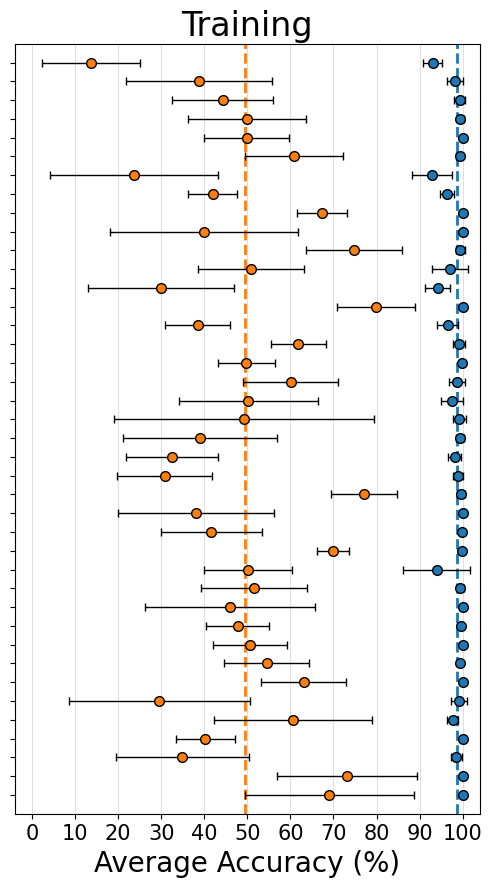

In [6]:
A_data = start_end
A_data.sort_values(by=["name"])
A_data.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize =(6, 10))
ax = fig.add_subplot(111)

y = list(reversed(range(len(A_data))))

ax.errorbar(A_data[("train","final","mean","per")], y, xerr=A_data[("train","final","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)
ax.errorbar(A_data[("train","start","mean","per")], y, xerr=A_data[("train","start","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)

ax.set(xlim=(-4, 104), xticks=np.arange(0, 105, 10),
       ylim=(-1, len(A_data)), yticks=np.arange(0, len(A_data), 1))
     
ax.set_yticklabels([])
ax.set_xticklabels(labels=np.arange(0, 105, 10), fontsize=15)
ax.set_xlabel("Average Accuracy (%)")

ax.vlines(A_data[("train","final","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#1f77b4",linewidths=2)
ax.vlines(A_data[("train","start","mean","per")].mean(),-1,len(A_data),linestyles="dashed",colors="#ff7f0e",linewidths=2)
ax.grid(axis='x', alpha=0.4)

plt.title("Training")

print("start_average:", A_data[("train","start","mean","per")].mean())
print("final_average:", A_data[("train","final","mean","per")].mean())

# show plot
plt.show()

start_average: 46.74370236928276
final_average: 94.90448515661927


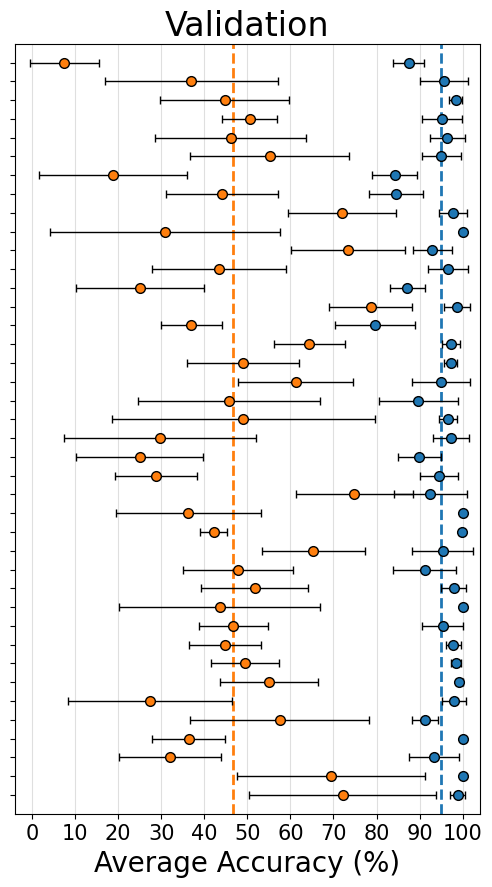

In [7]:
C_data = start_end
C_data.sort_values(by=["name"])
C_data.reset_index(inplace=True, drop=True)

fig = plt.figure(figsize =(6, 10))
ax = fig.add_subplot(111)

y = list(reversed(range(len(A_data))))

ax.errorbar(A_data[("valid","final","mean","per")], y, xerr=A_data[("valid","final","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)
ax.errorbar(A_data[("valid","start","mean","per")], y, xerr=A_data[("valid","start","std","per")],
            fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", zorder=10, markersize=7)

ax.set(xlim=(-4, 104), xticks=np.arange(0, 105, 10),
       ylim=(-1, len(C_data)), yticks=np.arange(0, len(C_data), 1))
     
ax.set_yticklabels([])
ax.set_xticklabels(labels=np.arange(0, 105, 10), fontsize=15)
ax.set_xlabel("Average Accuracy (%)")

ax.vlines(C_data[("valid","final","mean","per")].mean(),-1,len(C_data),linestyles="dashed",colors="#1f77b4",linewidths=2)
ax.vlines(C_data[("valid","start","mean","per")].mean(),-1,len(C_data),linestyles="dashed",colors="#ff7f0e",linewidths=2)
ax.grid(axis='x', alpha=0.4)

plt.title("Validation")

print("start_average:", A_data[("valid","start","mean","per")].mean())
print("final_average:", A_data[("valid","final","mean","per")].mean())

# show plot
plt.show()

In [8]:
per_dict = {}

per_dict["start"] = data["start_train"]/(data["N"]*8)*100

for i in range(1,101):
    per_dict[f"{i}"] = data[f"{i}"]/(data["N"]*8)*100

per_df = pd.concat(per_dict.values(), axis=1)
per_df.columns = per_dict.keys()

per_df

,start,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,1.785714,59.151786,62.723214,66.071429,71.428571,73.883929,75.446429,77.678571,78.27381,79.464286,...,92.559524,92.559524,92.559524,92.559524,92.559524,92.559524,92.559524,92.559524,92.559524,92.559524
1,7.142857,68.44308,68.833705,72.321429,75.055804,77.232143,78.180804,79.073661,79.241071,81.696429,...,89.657738,89.657738,89.657738,89.657738,89.657738,89.657738,89.657738,89.657738,89.657738,89.657738
2,8.035714,31.547619,64.136905,67.286706,72.544643,81.919643,83.705357,85.9375,86.830357,87.276786,...,94.866071,94.866071,94.866071,94.866071,94.866071,94.866071,94.866071,94.866071,94.866071,94.866071
3,26.488095,40.327381,50.14881,54.315476,66.294643,70.535714,71.428571,72.767857,74.776786,75.669643,...,95.089286,95.089286,95.089286,95.089286,95.089286,95.089286,95.089286,95.089286,95.089286,95.089286
4,25.074405,57.366071,66.220238,66.220238,70.089286,72.433036,76.488095,77.901786,79.092262,80.580357,...,93.080357,93.080357,93.080357,93.080357,93.080357,93.080357,93.080357,93.080357,93.080357,93.080357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,82.8125,90.024038,90.024038,93.75,94.711538,95.913462,97.355769,98.317308,99.278846,99.278846,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
196,77.644231,84.855769,84.855769,85.336538,87.740385,89.423077,94.471154,94.951923,98.076923,98.076923,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
197,76.682692,84.375,91.586538,92.307692,93.269231,94.471154,95.432692,96.394231,97.596154,97.596154,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
198,34.375,49.158654,61.057692,67.307692,75.0,81.730769,86.057692,86.538462,92.788462,92.788462,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


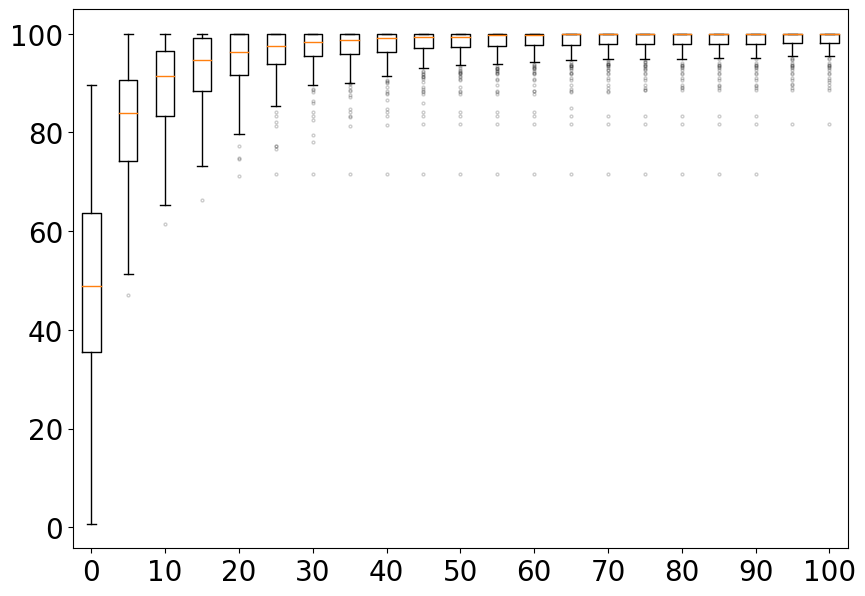

In [12]:
fig = plt.figure(figsize =(10, 7))

ax = fig.add_subplot(111)

bp = ax.boxplot(per_df.iloc[:,::5])

ax.set_xticks(range(1,22,2))
ax.set_xticklabels(range(0,101,10))


for flier in bp['fliers']:
    flier.set(marker ='o',
              color ='#e7298a',
              alpha = 0.2,
              markersize = 2)

# show plot
plt.show()



In [ ]:
averages = per_df.mean(axis=0)

stds = per_df.std(axis=0)

plot_data = pd.concat([averages, stds], axis=1)
plot_data.columns = ["average", "std"]

plot_data

,average,std
start,49.382438,19.626457
1,65.446974,16.420468
2,70.624335,14.995688
3,75.357861,13.222256
4,79.014468,12.088824
...,...,...
96,98.556091,2.656449
97,98.561378,2.651628
98,98.568155,2.646546
99,98.5839,2.640821


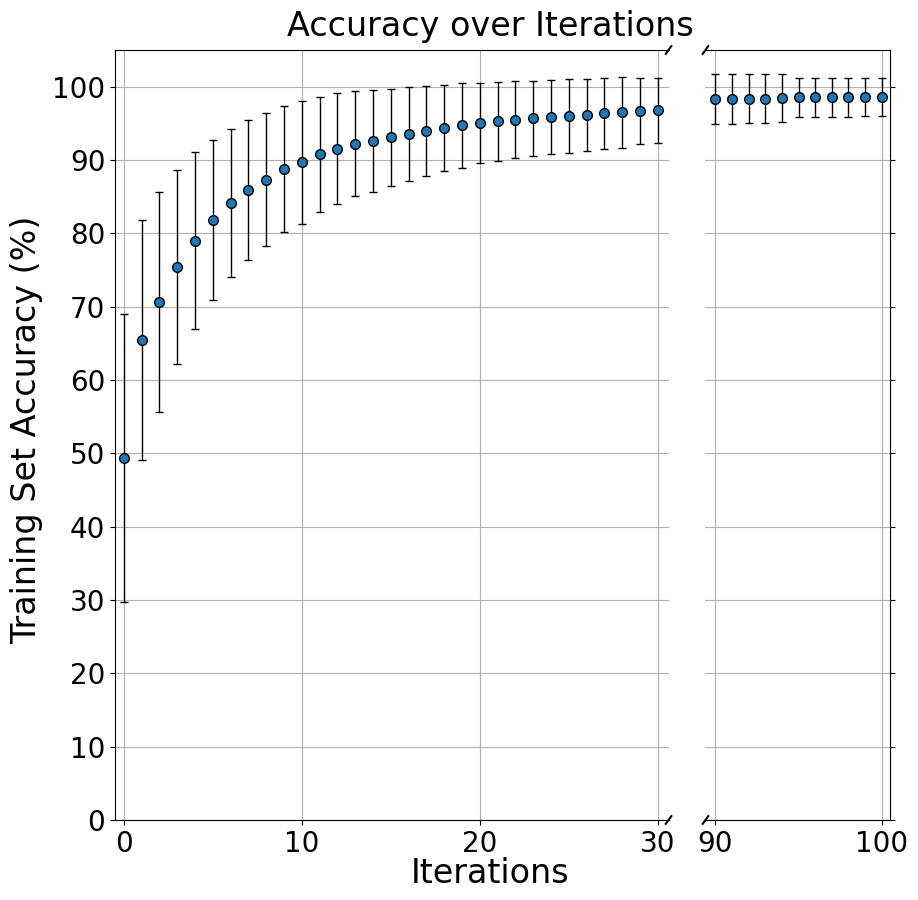

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, width_ratios=[3, 1], figsize=(10,10))

x = plot_data.index
y = plot_data["average"]
ax1.errorbar(x, y, yerr=plot_data["std"],
             fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", markersize=7)
ax2.errorbar(x, y, yerr=plot_data["std"],
             fmt="o", ecolor="k", linewidth=1, capsize=3, markeredgecolor="k", markersize=7)

x1max = 30
x2min = 90
ymax = 105

ax1.set(xlim=(-0.5, x1max+0.6), xticks=np.arange(0, x1max+1, 10), xticklabels=[f"{i}" for i in range(0,x1max+1,10)],
        ylim=(0, ymax), yticks=np.arange(0, ymax+1, 10))

ax2.set(xlim=(x2min-0.6, 100.5), xticks=np.arange(x2min, 101, 10), xticklabels=[f"{i}" for i in range(x2min,101,10)],
        ylim=(0, ymax), yticks=np.arange(0, ymax+1, 10), yticklabels=[])

ax1.grid()
ax2.grid()

# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.tick_right()

# This looks pretty good, and was fairly painless, but you can get that
# cut-out diagonal lines look with just a bit more work. The important
# thing to know here is that in axes coordinates, which are always
# between 0-1, spine endpoints are at these locations (0, 0), (0, 1),
# (1, 0), and (1, 1).  Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = 0.005  # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d, 1+d), (-d, +d), **kwargs)
ax1.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-3*d, +3*d), (1-d, 1+d), **kwargs)
ax2.plot((-3*d, +3*d), (-d, +d), **kwargs)


fig.subplots_adjust(wspace=0.1)


fig.suptitle("Accuracy over Iterations", y=0.92)
fig.supxlabel("Iterations", y=0.04)
fig.supylabel("Training Set Accuracy (%)")

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

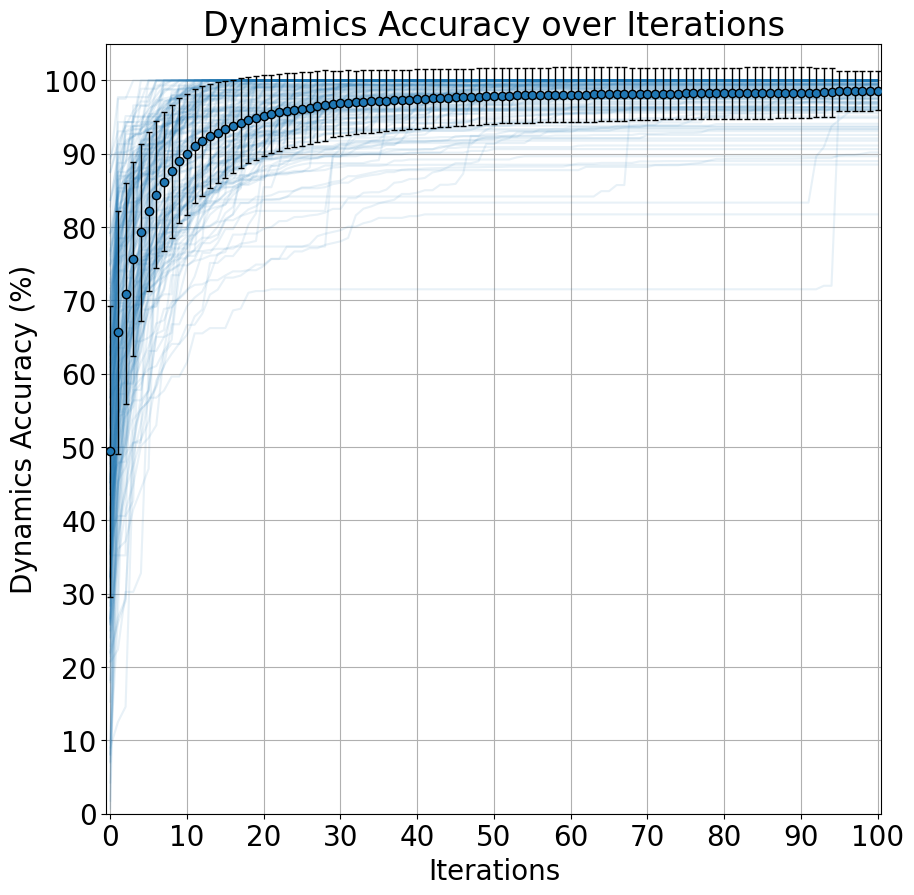

In [ ]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_df.index)):
    ax.plot(per_df.columns, per_df.iloc[i], color="#1f77b4", alpha=0.1)

xmax = 100.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt.show()

In [ ]:
per_avg_dict = {}

for i in range(0,175,5):
    per_avg_dict[f"{i}"] = per_df.loc[i:i+4,:].mean(axis=0)

per_avg_df = pd.concat(per_avg_dict, axis=1)
per_avg_df = per_avg_df.transpose()
# per_avg_df.columns = per_df.keys()

per_avg_df

,start,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,13.705357,51.367188,62.412574,65.243056,71.082589,75.200893,77.049851,78.671875,79.642857,80.9375,...,93.050595,93.050595,93.050595,93.050595,93.050595,93.050595,93.050595,93.050595,93.050595,93.050595
5,38.786232,76.047101,79.73279,84.978865,87.801932,89.803744,90.881643,91.271135,91.923309,92.85628,...,98.125,98.125,98.125,98.125,98.125,98.125,98.125,98.125,98.125,98.179348
10,44.227483,65.365812,71.765407,77.83065,88.742003,90.924242,92.058712,92.835227,95.191288,95.801136,...,99.166667,99.166667,99.166667,99.166667,99.166667,99.280303,99.280303,99.280303,99.280303,99.280303
15,49.909346,61.72933,68.227043,70.799048,73.79292,77.304564,79.283169,81.346384,82.715511,85.487377,...,99.49838,99.49838,99.49838,99.49838,99.49838,99.49838,99.49838,99.49838,99.49838,99.49838
20,49.896233,57.199737,61.765846,66.901377,71.883524,73.926208,75.541228,78.23456,80.437664,81.919192,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
25,23.664251,53.464092,62.709573,67.925068,72.166471,75.356854,78.132668,80.098494,82.462718,83.146818,...,92.8478,92.8478,92.8478,92.8478,92.8478,92.8478,92.8478,92.8478,92.8478,92.8478
30,60.71875,72.072917,73.455729,78.252604,80.322917,82.618056,83.674479,85.97526,87.662326,88.340833,...,99.354167,99.354167,99.354167,99.354167,99.354167,99.354167,99.354167,99.354167,99.354167,99.354167
35,67.333333,78.166667,82.5,87.861111,89.152778,91.282407,92.824074,94.430556,95.583333,96.333333,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
40,41.921021,61.175944,66.598961,70.753805,73.756437,77.006547,78.499082,80.746293,82.070043,83.162546,...,96.105896,96.10992,96.10992,96.158531,96.17242,96.219768,96.233657,96.26375,96.310046,96.322672
45,39.913194,72.569444,74.375,79.201389,81.423611,83.090278,91.180556,94.236111,95.277778,96.736111,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


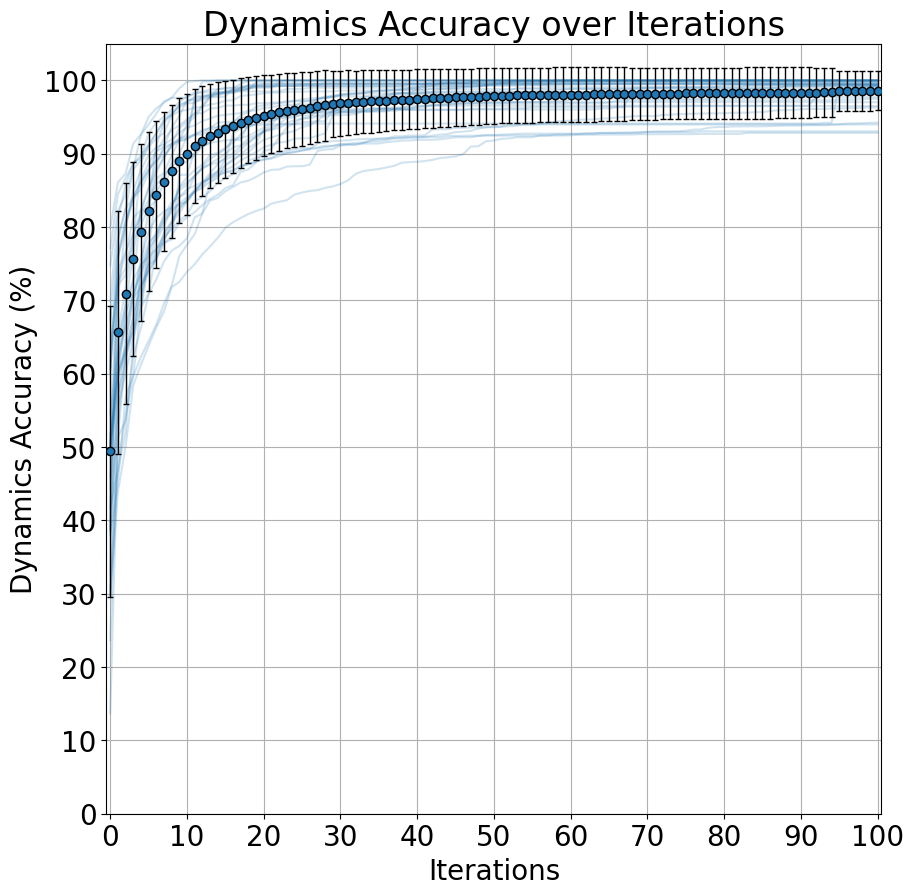

In [ ]:
fig = plt.figure(figsize =(10, 10))
ax = fig.add_subplot(111)

x = plot_data.index
y = plot_data["average"]
ax.errorbar(x, y, yerr=plot_data["std"], fmt="o", ecolor="k", linewidth=1, capsize=2, markeredgecolor="k", zorder=10)
for i in range(len(per_avg_df.index)):
    ax.plot(per_avg_df.columns, per_avg_df.iloc[i], color="#1f77b4", alpha=0.2)

xmax = 100.5
ymax = 105

ax.set(xlim=(-0.5, xmax), ylim=(0, ymax))
ax.set_xlabel("Iterations")
ax.set_ylabel("Dynamics Accuracy (%)")

plt.title("Dynamics Accuracy over Iterations")
plt.yticks(np.arange(0, ymax+1, 10))
plt.xticks(np.arange(0, xmax+1, 10), labels=[f"{i}" for i in range(0,int(xmax+1),10)])
plt.grid()

plt.show()